In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [10]:
df = pd.read_csv("fruits.csv", usecols=["weight", "color","target"])
le = preprocessing.LabelEncoder() 
df.color = le.fit_transform(df.color)
df.target = le.fit_transform(df.target)

In [11]:
X = df[["weight","color"]]
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [25]:
bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=3, bootstrap_features=True)

In [26]:
bc.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  bootstrap_features=True, n_estimators=3)

In [48]:
dfpred = pd.DataFrame()
dfpred["p0"] = bc.estimators_[0].predict_proba(X_test)[:, 1]
dfpred["p1"] = bc.estimators_[1].predict_proba(X_test)[:, 1]
dfpred["p2"] = bc.estimators_[2].predict_proba(X_test)[:, 1]

In [49]:
dfpred.corr()

,p0,p1,p2
p0,1.000000,0.636107,0.991413
p1,0.636107,1.000000,0.631716
p2,0.991413,0.631716,1.000000


In [27]:
bc.estimators_features_

[array([0, 1]), array([1, 1]), array([0, 1])]

[Text(167.40000000000003, 190.26, 'X[1] <= 1.5\ngini = 0.5\nsamples = 4705\nvalue = [3703, 3797]'),
 Text(100.44000000000001, 135.9, 'X[1] <= 0.5\ngini = 0.405\nsamples = 3088\nvalue = [1389, 3529]'),
 Text(66.96000000000001, 81.53999999999999, 'X[0] <= 89.9\ngini = 0.182\nsamples = 1009\nvalue = [1389, 156]'),
 Text(33.480000000000004, 27.180000000000007, 'gini = 0.0\nsamples = 381\nvalue = [593, 0]'),
 Text(100.44000000000001, 27.180000000000007, 'gini = 0.274\nsamples = 628\nvalue = [796, 156]'),
 Text(133.92000000000002, 81.53999999999999, 'gini = 0.0\nsamples = 2079\nvalue = [0, 3373]'),
 Text(234.36, 135.9, 'X[0] <= 90.122\ngini = 0.186\nsamples = 1617\nvalue = [2314, 268]'),
 Text(200.88000000000002, 81.53999999999999, 'gini = 0.0\nsamples = 573\nvalue = [928, 0]'),
 Text(267.84000000000003, 81.53999999999999, 'X[0] <= 109.587\ngini = 0.272\nsamples = 1044\nvalue = [1386, 268]'),
 Text(234.36, 27.180000000000007, 'gini = 0.464\nsamples = 461\nvalue = [461, 267]'),
 Text(301.3200

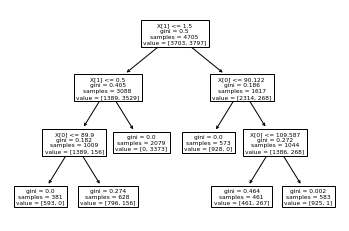

In [28]:
tree.plot_tree(bc.estimators_[0])

[Text(200.88000000000002, 181.2, 'X[1] <= 1.5\ngini = 0.5\nsamples = 4718\nvalue = [3850, 3650]'),
 Text(133.92000000000002, 108.72, 'X[0] <= 0.5\ngini = 0.429\nsamples = 3117\nvalue = [1547, 3419]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.161\nsamples = 1037\nvalue = [1547, 150]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 2080\nvalue = [0, 3269]'),
 Text(267.84000000000003, 108.72, 'gini = 0.166\nsamples = 1601\nvalue = [2303, 231]')]

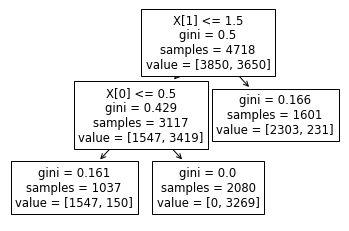

In [29]:
tree.plot_tree(bc.estimators_[1])

[Text(167.40000000000003, 190.26, 'X[1] <= 1.5\ngini = 0.5\nsamples = 4760\nvalue = [3768, 3732]'),
 Text(100.44000000000001, 135.9, 'X[1] <= 0.5\ngini = 0.417\nsamples = 3141\nvalue = [1466, 3491]'),
 Text(66.96000000000001, 81.53999999999999, 'X[0] <= 109.978\ngini = 0.158\nsamples = 1020\nvalue = [1466, 139]'),
 Text(33.480000000000004, 27.180000000000007, 'gini = 0.238\nsamples = 653\nvalue = [867, 139]'),
 Text(100.44000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 367\nvalue = [599, 0]'),
 Text(133.92000000000002, 81.53999999999999, 'gini = 0.0\nsamples = 2121\nvalue = [0, 3352]'),
 Text(234.36, 135.9, 'X[0] <= 90.067\ngini = 0.172\nsamples = 1619\nvalue = [2302, 241]'),
 Text(200.88000000000002, 81.53999999999999, 'gini = 0.0\nsamples = 598\nvalue = [950, 0]'),
 Text(267.84000000000003, 81.53999999999999, 'X[0] <= 109.702\ngini = 0.257\nsamples = 1021\nvalue = [1352, 241]'),
 Text(234.36, 27.180000000000007, 'gini = 0.448\nsamples = 455\nvalue = [472, 241]'),
 Text(301.3

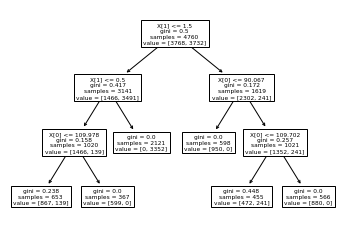

In [30]:
tree.plot_tree(bc.estimators_[2])

In [10]:
dtc.fit(X_train, y_train)
pred_train = dtc.predict_proba(X_train)[:, 1]
pred_test = dtc.predict_proba(X_test)[:, 1]
score_train = roc_auc_score(y_train, pred_train)
score_test = roc_auc_score(y_test, pred_test)
print(score_train, score_test)
#2 0.9618597923456943
#3 0.9852814376934589
#4 0.9896073555336901
#5 0.9897108111432261
#6 0.9882140679130025
#7 0.9875158226226348
#100 0.9275452001721912


NameError: name 'dtc' is not defined

In [ ]:
tree.plot_tree(dtc)

In [ ]:
tree.plot_tree(dtc)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6), n_estimators=20, learning_rate=0.1)

In [ ]:
adb.fit(X_train, y_train)

In [ ]:
adb.estimators_

In [ ]:
for i in range(20):
    pred_train = adb.estimators_[i].predict_proba(X_train)[:,1]
    score_train = roc_auc_score(y_train, pred_train)
    pred_test = adb.estimators_[i].predict_proba(X_test)[:,1]
    score_test = roc_auc_score(y_test, pred1)
    print(score_train, score_test)

In [ ]:
pred_test = adb.predict_proba(X_test)[:,1]
score_test = roc_auc_score(y_test, pred1)
print(score_test)

In [31]:
import xgboost

In [45]:
xgb = xgboost.XGBClassifier(n_estimators=200, max_depth=3, learning_rate=0.5, early_stopping_rounds=10)

In [46]:
xgb.fit(X_train, y_train, eval_set=[(X_train,y_train),(X_test,y_test)], verbose=True)

[0]	validation_0-logloss:0.37145	validation_1-logloss:0.37637
[1]	validation_0-logloss:0.25104	validation_1-logloss:0.25878
[2]	validation_0-logloss:0.18679	validation_1-logloss:0.19273
[3]	validation_0-logloss:0.15571	validation_1-logloss:0.16046
[4]	validation_0-logloss:0.13298	validation_1-logloss:0.14071
[5]	validation_0-logloss:0.12168	validation_1-logloss:0.12965
[6]	validation_0-logloss:0.11519	validation_1-logloss:0.12243
[7]	validation_0-logloss:0.10777	validation_1-logloss:0.11716
[8]	validation_0-logloss:0.10520	validation_1-logloss:0.11509
[9]	validation_0-logloss:0.10148	validation_1-logloss:0.11190
[10]	validation_0-logloss:0.10037	validation_1-logloss:0.11042
[11]	validation_0-logloss:0.09966	validation_1-logloss:0.10989
[12]	validation_0-logloss:0.09741	validation_1-logloss:0.10888
[13]	validation_0-logloss:0.09697	validation_1-logloss:0.10827
[14]	validation_0-logloss:0.09649	validation_1-logloss:0.10857
[15]	validation_0-logloss:0.09598	validation_1-logloss:0.10898
[1

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
pred_test = xgb.predict_proba(X_test)
score_test = roc_auc_score(y_test, pred1)
print(score_test)